In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
#importo i dati

df = pd.read_csv("data/train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df.shape

(4250, 20)

In [5]:
# Outliers

Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 
print (IQR)

account_length                   54.0000
number_vmail_messages            16.0000
total_day_minutes                72.8750
total_day_calls                  26.0000
total_day_charge                 12.3850
total_eve_minutes                67.8500
total_eve_calls                  27.0000
total_eve_charge                  5.7650
total_night_minutes              67.4750
total_night_calls                27.0000
total_night_charge                3.0375
total_intl_minutes                3.5000
total_intl_calls                  3.0000
total_intl_charge                 0.9400
number_customer_service_calls     1.0000
dtype: float64


In [6]:
#Rimozione outliers

df= df[~ ((df<(Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis = 1)]
df.shape

(3515, 20)

In [7]:
#Valori mancanti

df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
#Modifica variabili

mod = {"international_plan":     {"yes": 1, "no": 0},
                "voice_mail_plan": {"yes": 1, "no": 0}}
df = df.replace(mod)

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
7,WV,141,area_code_415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [9]:
# Riguardo la variabile number_vmail_messages

df.groupby('number_vmail_messages').aggregate('state').count()


number_vmail_messages
0     2641
4        1
6        1
8        1
10       4
11       2
12       9
13       3
14       5
15      11
16      15
17      13
18      16
19      23
20      20
21      28
22      33
23      36
24      48
25      40
26      47
27      45
28      48
29      52
30      44
31      56
32      40
33      44
34      28
35      27
36      27
37      29
38      28
39      32
40      18
Name: state, dtype: int64

In [10]:
df['number_vmail_messages'] = pd.cut(df['number_vmail_messages'], bins=[-1,1,53], labels=['0','1'])   
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [11]:
# nuova variabile con il totale dei minuti

df['total_minutes']=df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,611.5
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,527.2
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,501.9
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,...,8.76,211.8,96,9.53,7.1,6,1.92,0,no,471.9
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,no,807.0


In [12]:
# nuova variabile con il totale delle chiamate

df['total_calls']=df['total_day_calls']+df['total_eve_calls']+df['total_night_calls']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,no,611.5,329
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,no,527.2,328
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,no,501.9,356
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,...,211.8,96,9.53,7.1,6,1.92,0,no,471.9,269
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,...,326.4,97,14.69,11.2,5,3.02,0,no,807.0,292


In [13]:
#nuova variabile totale addebiti

df['total_charge']=df['total_day_charge']+df['total_eve_charge']+df['total_night_charge']
df.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,no,611.5,329,55.54
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,no,527.2,328,59.00
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,no,501.9,356,49.36
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,...,96,9.53,7.1,6,1.92,0,no,471.9,269,44.98
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,...,97,14.69,11.2,5,3.02,0,no,807.0,292,77.52


In [14]:
#addebito al minuto

df['charge_minute']=df['total_charge']/df['total_minutes']
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,charge_minute
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,no,611.5,329,55.54,0.090826
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,no,527.2,328,59.00,0.111912
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,no,501.9,356,49.36,0.098346
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,...,9.53,7.1,6,1.92,0,no,471.9,269,44.98,0.095317
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,...,14.69,11.2,5,3.02,0,no,807.0,292,77.52,0.096059


In [15]:
df[df['total_intl_minutes']==0].count()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
total_minutes                    0
total_calls                      0
total_charge                     0
charge_minute                    0
dtype: int64

In [16]:
#addebito al minuto per chiamate internazionali


df['charge_minute_intl']=df['total_intl_charge']/df['total_intl_minutes']
df.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,charge_minute,charge_minute_intl
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,13.7,3,3.70,1,no,611.5,329,55.54,0.090826,0.270073
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,no,527.2,328,59.00,0.111912,0.269672
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,no,501.9,356,49.36,0.098346,0.270297
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,...,7.1,6,1.92,0,no,471.9,269,44.98,0.095317,0.270423
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,...,11.2,5,3.02,0,no,807.0,292,77.52,0.096059,0.269643


<AxesSubplot:ylabel='Density'>

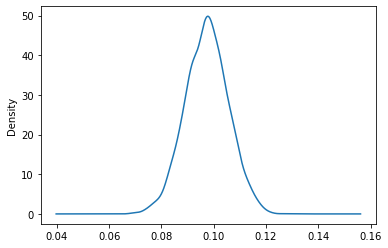

In [17]:
#guardiamo la distribuzione di charge minutes

df['charge_minute'].plot(kind = 'density')


<AxesSubplot:ylabel='Density'>

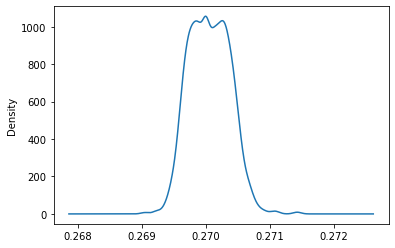

In [18]:
#guardiamo la distribuzione di charge_minutes_intl

df['charge_minute_intl'].plot(kind = 'density')


In [26]:
mod2 = {"churn":     {"yes": 1, "no": 0}}
df = df.replace(mod2)

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,charge_minute,charge_minute_intl
0,OH,107,area_code_415,0,1,1,161.6,123,27.47,195.5,...,13.7,3,3.70,1,0,611.5,329,55.54,0.090826,0.270073
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,12.2,5,3.29,0,0,527.2,328,59.00,0.111912,0.269672
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,10.1,3,2.73,3,0,501.9,356,49.36,0.098346,0.270297
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,...,7.1,6,1.92,0,0,471.9,269,44.98,0.095317,0.270423
7,WV,141,area_code_415,1,1,1,258.6,84,43.96,222.0,...,11.2,5,3.02,0,0,807.0,292,77.52,0.096059,0.269643


In [27]:
df2=df.iloc[:,[3,4,18,19,23,24]]
df2.head()

,international_plan,voice_mail_plan,number_customer_service_calls,churn,charge_minute,charge_minute_intl
0,0,1,1,0,0.090826,0.270073
1,0,0,0,0,0.111912,0.269672
3,1,0,3,0,0.098346,0.270297
5,1,0,0,0,0.095317,0.270423
7,1,1,0,0,0.096059,0.269643


In [28]:
X=df2.iloc[:,[0,1,2,4,5]]
y=df2.iloc[:,[3]]
y

,churn
0,0
1,0
3,0
5,0
7,0
...,...
4243,1
4245,0
4246,0
4247,0


In [32]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [31]:
#Partiamo con il KNEARESTNEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, balanced_accuracy_score, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [34]:
#RANDOMIZED SEARCH CV

params = {'n_neighbors':[i for i in range(1,11)]}
knc = KNeighborsClassifier()
for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    rcv = RandomizedSearchCV(knc, param_distributions = params, cv=3,scoring = i,random_state=123)
    rcv.fit(X_train,y_train.values.ravel())
    print('Metrics: {}\nBest params: {}\nBest score: {}'.format(i,rcv.best_params_,rcv.best_score_))

Metrics: f1
Best params: {'n_neighbors': 1}
Best score: 0.26482920694255047
Metrics: balanced_accuracy
Best params: {'n_neighbors': 1}
Best score: 0.5907729241500125
Metrics: accuracy
Best params: {'n_neighbors': 10}
Best score: 0.8926036079702114
Metrics: roc_auc
Best params: {'n_neighbors': 9}
Best score: 0.7246017855564396


In [36]:
#cross validation

knc_f1 = []
knc_b_acc = []
knc_acc = []
knc_auc = []

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    knc = KNeighborsClassifier(n_neighbors=10)
    metrics = cross_val_score(knc, X_train, y_train.values.ravel(), cv = 10, scoring=i)
    if i == 'f1':
        knc_f1.append(metrics)
    elif i == 'balanced_accuracy':
        knc_b_acc.append(metrics)
    elif i == 'roc_auc':
        knc_auc.append(metrics)
    else:
        knc_acc.append(metrics)

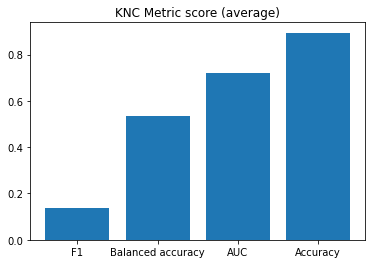

In [37]:

plt.bar(['F1','Balanced accuracy','AUC','Accuracy'],[np.mean(knc_f1), np.mean(knc_b_acc), np.mean(knc_auc),np.mean(knc_acc)])
plt.title('KNC Metric score (average)');


In [41]:

knc_train_acc = []
knc_test_acc = []

for k in range (1,21):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train,y_train.values.ravel())
    train_preds = knc.predict(X_train)
    test_preds = knc.predict(X_test)
    train_acc = accuracy_score(y_train.values.ravel(),train_preds)
    test_acc = accuracy_score(y_test,test_preds)
    knc_train_acc.append(train_acc)
    knc_test_acc.append(test_acc)

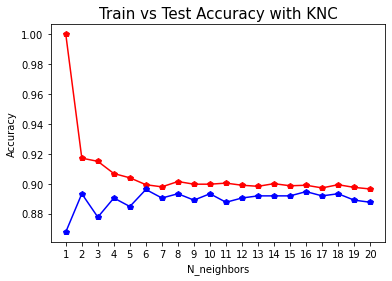

In [42]:

plt.plot(range(1,21),knc_train_acc, '-rp')
plt.plot(range(1,21),knc_test_acc, '-bp')
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(1,21))
plt.title('Train vs Test Accuracy with KNC',{'fontsize':15});

In [44]:

knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(X_train,y_train.values.ravel())
preds_k_6 = knc.predict(X_test)
preds_prob_k_6 = knc.predict_proba(X_test)[:,1]
fpr_k_6, tpr_k_6, tresholds_k_6 = roc_curve(y_test,preds_prob_k_6)
prec_k_6, recall_k_6, tresh_k_6 = precision_recall_curve(y_test,preds_prob_k_6)
auc_score_k_6 = roc_auc_score(y_test,preds_prob_k_6)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [47]:

params = {'min_samples_split':[2,3,4],
          'min_samples_leaf':[1,2,3,4,5],
          'max_depth':[1,4,5,6,7]}

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    rcv = RandomizedSearchCV(dt, param_distributions = params, cv=3,scoring = i,random_state=123)
    rcv.fit(X_train,y_train.values.ravel())
    print('Metrics: {}\nBest params: {}\nBest score: {}'.format(i,rcv.best_params_,rcv.best_score_))

Metrics: f1
Best params: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 7}
Best score: 0.2771769985361679
Metrics: balanced_accuracy
Best params: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 7}
Best score: 0.587378639216348
Metrics: accuracy
Best params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 4}
Best score: 0.8897576456792118
Metrics: roc_auc
Best params: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 4}
Best score: 0.7493995845487492


In [48]:
f1_dt = []
b_acc_dt = []
acc_dt = []
auc_dt = []

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    dt = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 4, max_depth = 4)
    metrics = cross_val_score(dt, X_train, y_train, cv = 10, scoring=i)
    if i == 'f1':
        f1_dt.append(metrics)
    elif i == 'balanced_accuracy':
        b_acc_dt.append(metrics)
    elif i == 'roc_auc':
        auc_dt.append(metrics)
    else:
        acc_dt.append(metrics)

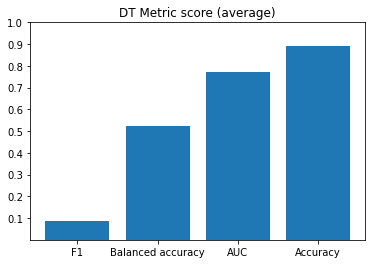

In [49]:

plt.bar(['F1','Balanced accuracy','AUC','Accuracy'],[np.mean(f1_dt), np.mean(b_acc_dt),np.mean(auc_dt),np.mean(acc_dt)])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('DT Metric score (average)');

In [50]:
dt = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 4, max_depth = 4)
dt.fit(X_train,y_train.values.ravel())
preds_dt = dt.predict(X_test)
preds_prob_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, tresholds_dt = roc_curve(y_test,preds_prob_dt)
prec_dt, recall_dt, tresh_dt = precision_recall_curve(y_test,preds_prob_dt)
auc_score_dt = roc_auc_score(y_test,preds_prob_dt)

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [52]:
params = {'C':[0.1,1,10,15,20,30,100,150,200], 'max_iter':[400,500,600]}

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    rcv = RandomizedSearchCV(lr, param_distributions = params, cv=3,scoring = i,random_state=123)
    rcv.fit(X_train,y_train.values.ravel())
    print('Metrics: {}\nBest params: {}\nBest score: {}'.format(i,rcv.best_params_,rcv.best_score_))

Metrics: f1
Best params: {'max_iter': 400, 'C': 200}
Best score: 0.14360573139199093
Metrics: balanced_accuracy
Best params: {'max_iter': 400, 'C': 200}
Best score: 0.5366248402883248
Metrics: accuracy
Best params: {'max_iter': 600, 'C': 15}
Best score: 0.8940262098563441
Metrics: roc_auc
Best params: {'max_iter': 400, 'C': 200}
Best score: 0.7897680062357866


In [54]:
f1_lr = []
b_acc_lr = []
acc_lr = []
auc_lr = []

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    lr = LogisticRegression(C = 15, max_iter=600)
    metrics = cross_val_score(lr, X_train, y_train.values.ravel(), cv = 4, scoring=i)
    if i == 'f1':
        f1_lr.append(metrics)
    elif i == 'balanced_accuracy':
        b_acc_lr.append(metrics)
    elif i == 'roc_auc':
        auc_lr.append(metrics)
    else:
        acc_lr.append(metrics)

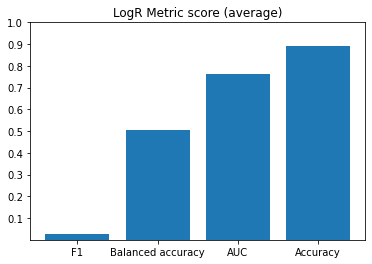

In [55]:
plt.bar(['F1','Balanced accuracy','AUC','Accuracy'],[np.mean(f1_lr), np.mean(b_acc_lr),np.mean(auc_lr), np.mean(acc_lr)])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('LogR Metric score (average)');


In [57]:
lr = LogisticRegression(C = 150, max_iter=600)
lr.fit(X_train,y_train.values.ravel())
preds_lr = lr.predict(X_test)
preds_prob_lr = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, tresholds_lr = roc_curve(y_test,preds_prob_lr)
prec_lr, recall_lr, tresh_lr = precision_recall_curve(y_test,preds_prob_lr)
auc_score_lr = roc_auc_score(y_test,preds_prob_lr)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [71]:
params = {'n_estimators' : [300,400,500],
          'max_depth': [15,20,30],
          'min_samples_leaf':[2,3]}

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    rcv = RandomizedSearchCV(rf, param_distributions = params, cv=3,scoring = i,random_state=123)
    rcv.fit(X_train,y_train.values.ravel())
    print('Metrics: {}\nBest params: {}\nBest score: {}'.format(i,rcv.best_params_,rcv.best_score_))

Metrics: f1
Best params: {'n_estimators': 300, 'min_samples_leaf': 2, 'max_depth': 15}
Best score: 0.20942045716924498
Metrics: balanced_accuracy
Best params: {'n_estimators': 400, 'min_samples_leaf': 2, 'max_depth': 20}
Best score: 0.5633365476563568
Metrics: accuracy
Best params: {'n_estimators': 400, 'min_samples_leaf': 3, 'max_depth': 15}
Best score: 0.8940273476344456
Metrics: roc_auc
Best params: {'n_estimators': 400, 'min_samples_leaf': 3, 'max_depth': 15}
Best score: 0.7616759480243968


In [73]:
f1_rf = []
b_acc_rf = []
acc_rf = []
auc_rf = []

for i in ['f1','balanced_accuracy','accuracy','roc_auc']:
    rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 3, max_depth = 15)
    metrics = cross_val_score(rf, X_train, y_train.values.ravel(), cv = 10, scoring=i)
    if i == 'f1':
        f1_rf.append(metrics)
    elif i == 'balanced_accuracy':
        b_acc_rf.append(metrics)
    elif i == 'roc_auc':
        auc_rf.append(metrics)
    else:
        acc_rf.append(metrics)

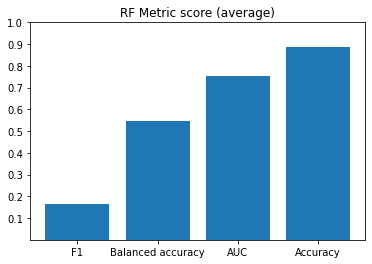

In [74]:
plt.bar(['F1','Balanced accuracy','AUC','Accuracy'],[np.mean(f1_rf), np.mean(b_acc_rf), np.mean(auc_rf),np.mean(acc_rf)])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('RF Metric score (average)');

In [75]:

rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 3, max_depth = 15)
rf.fit(X_train,y_train.values.ravel())
preds_rf = rf.predict(X_test)
preds_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, tresholds_rf = roc_curve(y_test,preds_prob_rf)
prec_rf, recall_rf, tresh_rf = precision_recall_curve(y_test,preds_prob_rf)
auc_score_rf = roc_auc_score(y_test,preds_prob_rf)

In [80]:
df2.drop('churn',axis=1).columns

Index(['international_plan', 'voice_mail_plan',
       'number_customer_service_calls', 'charge_minute', 'charge_minute_intl'],
      dtype='object')

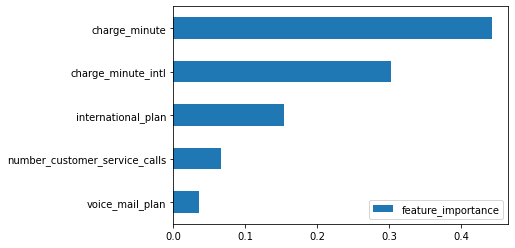

In [82]:
fi_df = pd.DataFrame(rf.feature_importances_, index = df2.drop('churn',axis=1).columns, columns = ['feature_importance'])
fi_df[fi_df.feature_importance>0.03].sort_values('feature_importance').plot(kind='barh');

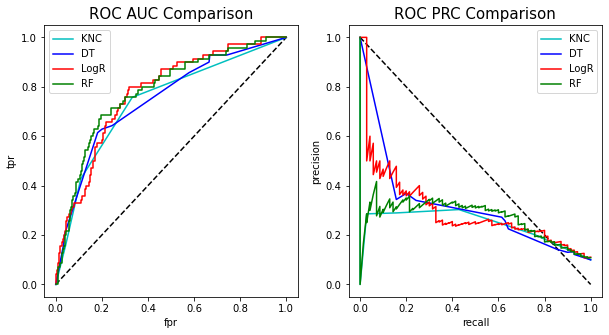

In [83]:

fig, [ax1,ax2] = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax1.plot([0,1],'k--')
ax1.plot(fpr_k_6,tpr_k_6,'c',label = 'KNC')
ax1.plot(fpr_dt,tpr_dt,'b', label = 'DT')
ax1.plot(fpr_lr,tpr_lr,'r', label = 'LogR')
ax1.plot(fpr_rf,tpr_rf,'g', label = 'RF')
ax1.set_xlabel('fpr')
ax1.set_ylabel('tpr')
ax1.set_title('ROC AUC Comparison', {'fontsize':15})
ax1.legend()

ax2.plot([1,0],'k--')
ax2.plot(recall_k_6,prec_k_6,'c',label = 'KNC')
ax2.plot(recall_dt,prec_dt,'b', label = 'DT')
ax2.plot(recall_lr,prec_lr,'r', label = 'LogR')
ax2.plot(recall_rf,prec_rf,'g', label = 'RF')
ax2.set_xlabel('recall')
ax2.set_ylabel('precision')
ax2.set_title('ROC PRC Comparison', {'fontsize':15})
ax2.legend();

In [107]:
test = pd.read_csv('data/test.csv')
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [108]:
Q1 = test.quantile(0.25) 
Q3 = test.quantile(0.75) 
IQR = Q3 - Q1 
test= test[~ ((test<(Q1 - 1.5 * IQR)) | (test> (Q3 + 1.5 * IQR))).any(axis = 1)]

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
total_minutes                    0
total_calls                      0
total_charge                     0
charge_minute                    0
charge_minute_intl               0
dtype: int64

In [109]:
#Modifica variabili

mod = {"international_plan":     {"yes": 1, "no": 0},
                "voice_mail_plan": {"yes": 1, "no": 0}}
test = test.replace(mod)

test['number_vmail_messages'] = pd.cut(test['number_vmail_messages'], bins=[-1,1,53], labels=['0','1'])   

test['total_minutes']=test['total_day_minutes']+test['total_eve_minutes']+test['total_night_minutes']

test['total_calls']=test['total_day_calls']+test['total_eve_calls']+test['total_night_calls']

test['total_charge']=test['total_day_charge']+test['total_eve_charge']+test['total_night_charge']

test['charge_minute']=test['total_charge']/test['total_minutes']

test['charge_minute_intl']=test['total_intl_charge']/test['total_intl_minutes']

mod2 = {"churn":     {"yes": 1, "no": 0}}
test = test.replace(mod2)

In [105]:
test.isfinite().sum()

AttributeError: 'DataFrame' object has no attribute 'isfinite'

In [110]:
test2=test.iloc[:,[4,5,19,23,24]]
test2.head()

,international_plan,voice_mail_plan,number_customer_service_calls,charge_minute,charge_minute_intl
0,0,1,1,0.103026,0.270000
1,1,0,0,0.101729,0.269841
3,0,0,3,0.105478,0.270370
4,0,0,3,0.085815,0.270323
5,0,0,2,0.079047,0.269718


In [ ]:
rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 3, max_depth = 15)
rf.fit(X,y.values.ravel())
predictions = rf.predict(test2.values)
submit_df = pd.DataFrame(predictions,index=test.id, columns = ['Churn'])
submit_df['Churn'] = submit_df.Churn.astype('int64').apply(lambda x: 'yes' if x == 1 else 'no')
submit_df.to_csv('Submission for kaggle.csv')